In [386]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

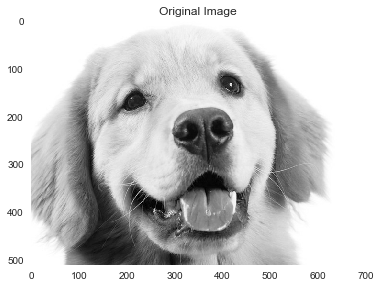

In [387]:
img = plt.imread('doggo.png')
img = img[:,:700,1]

plt.figure(figsize=(6,6))
plt.title('Original Image')
plt.imshow(-1*img)

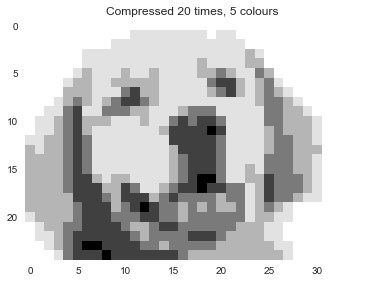

In [410]:
#x is the compression factor, x*x pixels will shrink into one square
x = 20
#k is the number of colours
k=5

n = img.shape[0]//20
m = img.shape[1]//20
pix = np.zeros([n,m])
for i in range(n):
    for j in range(m):
        pix[i][j] = int(round(np.mean(img[x*i:x*i+(x-1),x*j:x*j+(x-1)])*k,0))
        
plt.figure(figsize=(6,6))
plt.imshow(-1*pix)
plt.title('Compressed {} times, {} colours'.format(x,k))
plt.show()

In [411]:
cdict = {'red':   ((0.0, 0.0, 0.),
                   (.33,0.34,0.34),
                   (.66,0.86,0.86),
                   (1.0, 1.0, 0.91)),

         'green': ((0.0, 0.0, 0.0),
                   (0.33, 0.22, 0.22),
                   (0.66, 0.57, 0.57),
                   (1.0, 1,.57)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.33, 0.05, 0.05),
                   (0.66, 0.12, 0.12),
                   (1.0, 1, .37))
        }

brown = mpl.colors.LinearSegmentedColormap('brown', cdict)
plt.register_cmap('brown',brown)

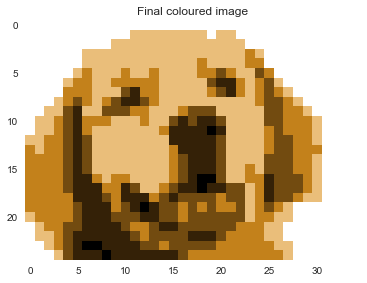

In [412]:
plt.figure(figsize=(6,6))
plt.title('Final coloured image')
plt.imshow(pix, cmap=brown)

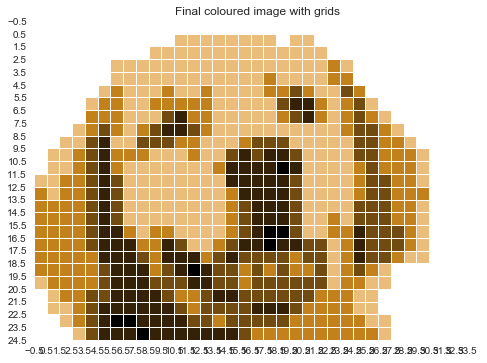

In [413]:
fig, ax = plt.subplots(figsize=(8,8))

ticks = np.arange(0-0.5,max(n,m)-0.5, 1)

ax.grid(True)
ax.set_title('Final coloured image with grids')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.imshow(pix, cmap=brown)
plt.show()